In [ ]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet
import plotly.io as pio
pio.renderers.default


'colab'

In [ ]:
df=pd.read_csv('TSLA.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-04-12,685.700012,704.799988,682.090027,701.979980,701.979980,29135700
1,2021-04-13,712.700012,763.000000,710.659973,762.320007,762.320007,44652800
2,2021-04-14,770.700012,780.789978,728.030029,732.229980,732.229980,49017400
3,2021-04-15,743.099976,743.690002,721.309998,738.849976,738.849976,27848900
4,2021-04-16,728.650024,749.409973,724.599976,739.780029,739.780029,27979500
...,...,...,...,...,...,...,...
249,2022-04-05,1136.300049,1152.869995,1087.300049,1091.260010,1091.260010,26691700
250,2022-04-06,1073.469971,1079.000000,1027.699951,1045.760010,1045.760010,29782800
251,2022-04-07,1052.390015,1076.589966,1021.539978,1057.260010,1057.260010,26482400
252,2022-04-08,1043.209961,1048.439941,1022.440002,1025.489990,1025.489990,18293300


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       254 non-null    object 
 1   Open       254 non-null    float64
 2   High       254 non-null    float64
 3   Low        254 non-null    float64
 4   Close      254 non-null    float64
 5   Adj Close  254 non-null    float64
 6   Volume     254 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,833.809764,852.346021,815.069844,834.239013,834.239013,2.519556e+07
std,177.314024,183.301174,169.239326,176.460477,176.460477,9.076098e+06
min,552.549988,566.210022,546.979980,563.460022,563.460022,9.800600e+06
25%,684.102493,697.552521,672.914994,685.100021,685.100021,1.880142e+07
50%,786.330017,801.859985,774.600006,788.424988,788.424988,2.365870e+07
75%,1000.817520,1021.759995,975.960022,1002.627487,1002.627487,2.977192e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,6.285210e+07


In [ ]:
px.area(df,x="Date",y="Close")

In [ ]:
px.line(df,x="Date",y="Close")

In [ ]:
px.line(df,x="Date",y="Volume")

In [ ]:
px.bar(df,y="Volume")

In [ ]:
px.box(df,y="Volume")

Facebook Prophet

In [ ]:
column=["Date","Close"]
df2=pd.DataFrame(df,columns=column)

In [ ]:
df2

,Date,Close
0,2021-04-12,701.979980
1,2021-04-13,762.320007
2,2021-04-14,732.229980
3,2021-04-15,738.849976
4,2021-04-16,739.780029
...,...,...
249,2022-04-05,1091.260010
250,2022-04-06,1045.760010
251,2022-04-07,1057.260010
252,2022-04-08,1025.489990


In [ ]:
prophet_df=df2.rename(columns={'Date':'ds','Close':'y'})

In [ ]:
model=Prophet()
model.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
futuredata=model.make_future_dataframe(periods=30)

In [ ]:
forecast=model.predict(futuredata)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-04-12,656.985453,552.917694,763.612898,656.985453,656.985453,-1.374044,-1.374044,-1.374044,-1.374044,-1.374044,-1.374044,0.0,0.0,0.0,655.611409
1,2021-04-13,656.971384,544.114042,753.520960,656.971384,656.971384,-7.879092,-7.879092,-7.879092,-7.879092,-7.879092,-7.879092,0.0,0.0,0.0,649.092292
2,2021-04-14,656.957314,544.407826,756.941750,656.957314,656.957314,-6.124961,-6.124961,-6.124961,-6.124961,-6.124961,-6.124961,0.0,0.0,0.0,650.832353
3,2021-04-15,656.943245,542.011992,755.571545,656.943245,656.943245,-13.650733,-13.650733,-13.650733,-13.650733,-13.650733,-13.650733,0.0,0.0,0.0,643.292512
4,2021-04-16,656.929176,539.911347,749.469276,656.929176,656.929176,-14.652395,-14.652395,-14.652395,-14.652395,-14.652395,-14.652395,0.0,0.0,0.0,642.276780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,2022-05-07,906.607721,818.936274,1032.450540,896.158206,914.902005,21.840613,21.840613,21.840613,21.840613,21.840613,21.840613,0.0,0.0,0.0,928.448334
280,2022-05-08,905.784005,818.431488,1034.436486,894.687020,914.626377,21.840613,21.840613,21.840613,21.840613,21.840613,21.840613,0.0,0.0,0.0,927.624617
281,2022-05-09,904.960288,798.090681,1006.477942,893.297277,914.385442,-1.374044,-1.374044,-1.374044,-1.374044,-1.374044,-1.374044,0.0,0.0,0.0,903.586244
282,2022-05-10,904.136572,797.271385,1005.419904,891.960351,914.329339,-7.879092,-7.879092,-7.879092,-7.879092,-7.879092,-7.879092,0.0,0.0,0.0,896.257480


In [ ]:
px.line(forecast,x='ds',y='yhat')

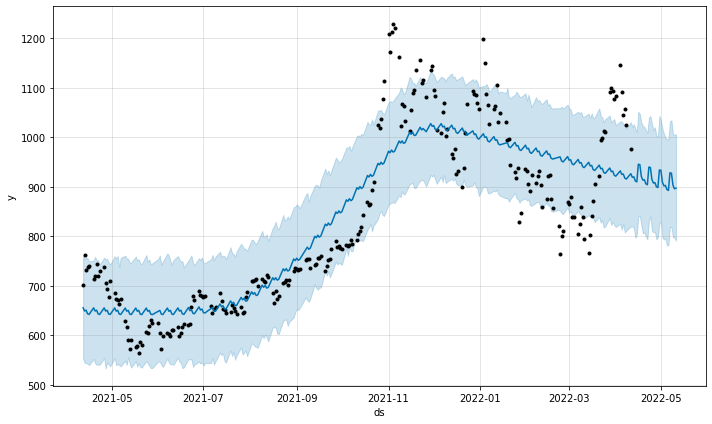

In [ ]:
figure=model.plot(forecast,xlabel='ds',ylabel='y')

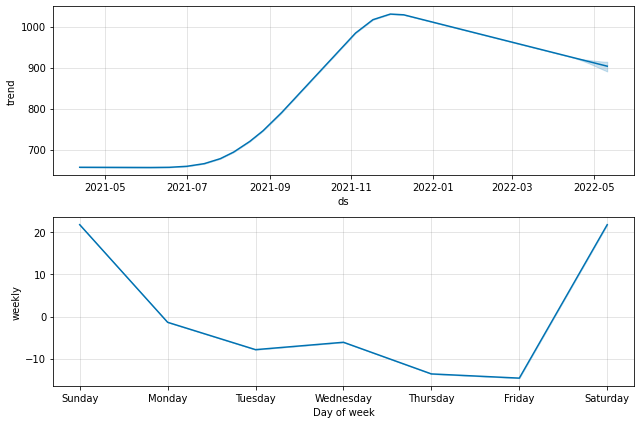

In [ ]:
figure2=model.plot_components(forecast)

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>